# Project 4 Clustering

### For this Project, I'll be using clustering methods on data in order to group similar data.

### The goal of this project is to gain insight into the data by identifying distinct groups that exist within the dataset. We'll employ clustering techniques, which belong to the unsupervised learning category. This means our methods will analyze unlabeled data to find underlying patterns and structures without explicit guidance. 
# Key Questions to Address

# Where do natural groups exist within the data?
# How can we identify outliers?
# What are the key features that differentiate groups within the data?
# What broader trends can we uncover in the data?

In [23]:
import folium
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
from math import sqrt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Clustering is an unsupervised machine learning technique that helps unveil inherent structures or patterns within a dataset. It achieves this by grouping similar data points together. The goal of clustering is to create clusters where data points within a cluster are more similar to each other than to data points in other clusters.

### K-Means clustering is a partitioning technique that divides 'n' observations into 'k' clusters, where each observation belongs to the cluster with the nearest mean (representing the cluster's center). Agglomerative clustering is a type of hierarchical clustering method that groups objects into clusters based on their similarity, starting with individual data points and iteratively merging them.

### This is the dataset I'll be using for this problem: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

### The dataset was found on Kaggle.com and contains shopping behaviors and demographic profiles of customers visiting a mall. The columns included in this dataset are:

### CustomerID: Unique identifier for each customer
### Gender: Customer's gender
### Age: Customer's age
### Annual Income: Customer's annual income
### Spending Score: Score assigned to the customer based on their spending behavior and purchasing data (higher scores indicate higher spending).

# Data Understanding and Processing

In [24]:
df = pd.read_csv("Mall_Customers.csv")
pd.set_option('display.max_columns', None)


print(df.dtypes)
print(df.describe)

print(df.head())


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137         

In [45]:
# Dropping customer ID because it does not contain relevant information for solving the problem .

# Data Visualization 

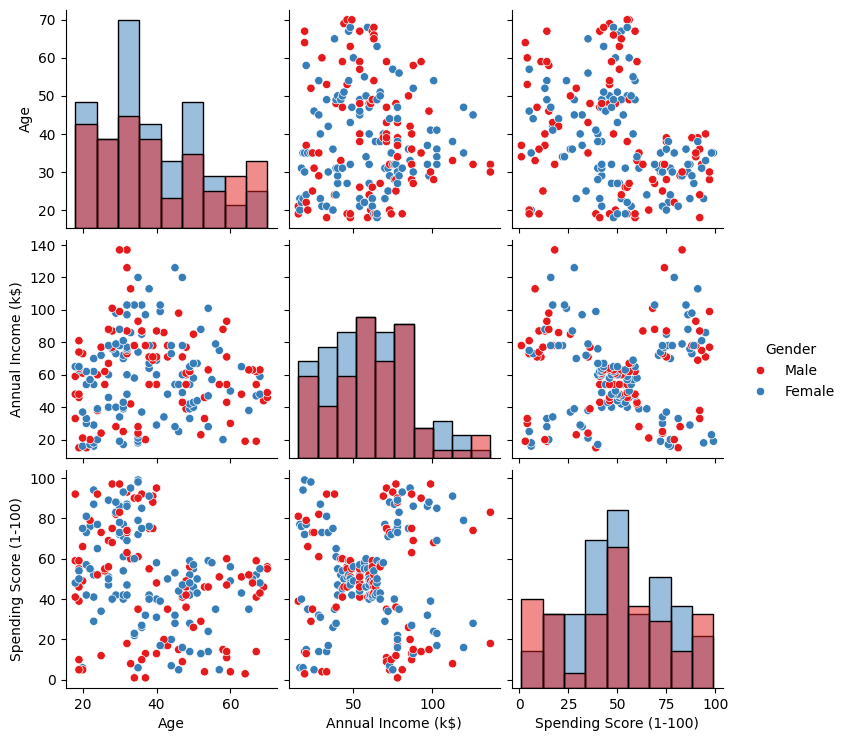

In [25]:
df.drop(['CustomerID'], axis=1, inplace=True)


sns.pairplot(df, hue='Gender', diag_kind='hist', palette='Set1')
plt.show()


### This pair plot allows us to visualize the relationships between variables in our dataset. Genders are color-coded for the scatter plots, allowing us to see how genders correlate with other variables. Additionally, the diagonal of the plot displays histograms for Age, Spending Score, and Annual Income. These visuals suggest that natural groups may already be present in the data, which is promising for using clustering methods to gain further insights.  There also don't appear to be any extreme outliers present that might skew the data.

### Considering the impact of each column included in a dataset is a quick way to detect whether a variable is useful or not. One column that differed from the rest was CustomerID, which the dataset describes as a unique identifier given to each customer. With this in mind, I decided to remove it from the dataset because of its lack of value and its potential to introduce noise into the clustering models. 

### Choosing Clustering Methods

### This dataset is well-suited for applying both K-means clustering and agglomerative clustering. Each method offers distinct advantages and disadvantages.

### K-means Clustering

### Pros: Straightforward, efficient, performs well with distinct clusters.
### Cons: Requires pre-defining the number of clusters. While methods exist to aid in cluster identification, their complexity increases with data complexity.
### Agglomerative Clustering

### Pros: No need to pre-define the number of clusters, provides a visual dendrogram to understand data structure.
### Cons: Less efficient due to higher computational costs.

### Because of its reliance on distance metrics, K-means requires numeric data. Our gender column isn't currently in a suitable format. We have two choices:

### Omit the gender column: This simplifies the analysis but removes potentially valuable information about spending patterns influenced by gender.

### Encode the gender column: This preserves the gender data but requires a numerical representation (e.g., one-hot encoding).
### The provided visualization suggests significant overlap between male and female data points. This, along with my focus on spending patterns regardless of gender, supports the decision to exclude the gender column for now.

### To start off, I'll use K-means because of its simplicity. However, we need to know how many clusters exist in the dataset. To do this we can run the clustering algorithm multiple times and plot the result. We can analyze our plot and see where the graph has the steepest slope and this number will serve as our number of clusters. 

In [26]:
df.drop(['Gender'], axis=1, inplace=True)

In [27]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


Text(0, 0.5, 'Variance')

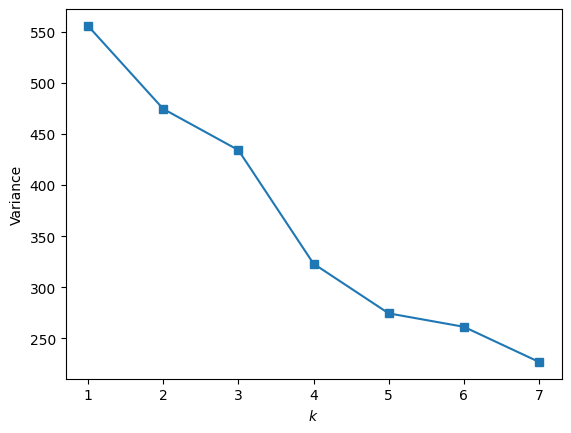

In [28]:
inertia = [] 
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init = 'auto').fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')
### The elbow methods shows around 4 clusters is the ideal in this dataset 

### Here it seems the steepest slope is at 4 so we'll use 4 as our number of clusters. 

In [29]:
kmeans = KMeans(n_clusters = 4, random_state = 1,n_init= 10).fit(X)

In [30]:
y = kmeans.fit_predict(X)

In [31]:
df['cluster'] = y

In [32]:
print(df.head())
print(df['cluster'].value_counts())


   Age  Annual Income (k$)  Spending Score (1-100)  cluster
0   19                  15                      39        2
1   21                  15                      81        2
2   20                  16                       6        3
3   23                  16                      77        2
4   31                  17                      40        3
cluster
3    95
1    39
0    38
2    28
Name: count, dtype: int64


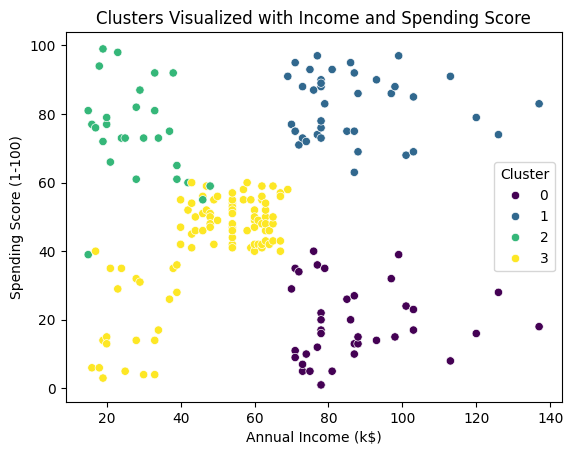

In [33]:
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['cluster'], palette='viridis')
## Age is less often related to spending habits, so i use annual income and spending score
plt.title('Clusters Visualized with Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

### Four relatively distinct clusters exist on our graph. Some things to note are that cluster 3 by far has contains the most datapoints. 
### We can also start identifying what the clusters may mean to our real world questions. Cluster 0 represents customers who have a moderate to high income and spend a relatively low amount of money when shopping. Cluster 1 shows those with a moderate to high annual income and tend to spend a high amount of money when shopping. Cluster 2 represents those who have a low monthly income and tend to spend a high amount of money when shopping. Cluster 3 represents customers with a Low Annual Income that tend to spend a low to moderate amount of money when shopping.


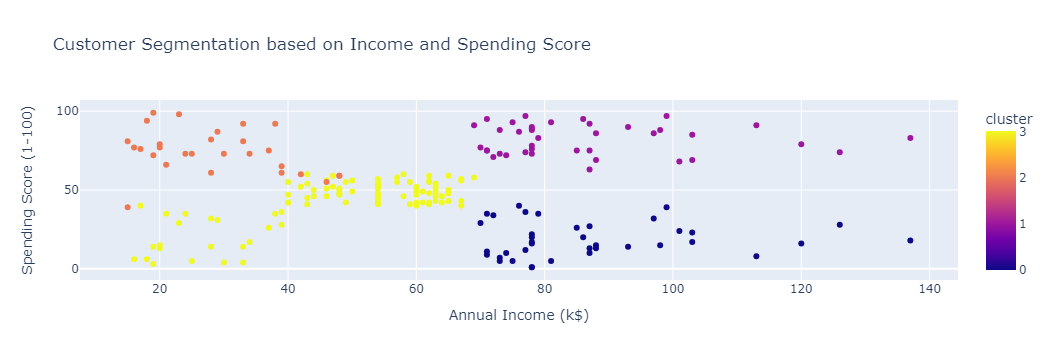

In [34]:
import plotly.express as px

# Using the same DataFrame `df` from above
fig = px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', color='cluster', title='Customer Segmentation based on Income and Spending Score')
fig.show()

### This is a more detailed view of our data that allows us to see the values of individual datapoints that exist in the clusters. These visualizations seem to support the idea that the majority of those(in this dataset) tend to have a relatively lower income and only spend a low to moderate amount of money. This is followed by those with a higher income who spend a larger amount of money, then those with a high income who spend a lower amount of money, and finally those with a low amount of income who spend a high amount of money. 

In [35]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage

In [36]:
agglom_df = pd.read_csv("Mall_Customers.csv")
agglom_df.drop(['CustomerID'], axis=1, inplace=True)
agglom_df.drop(['Gender'], axis=1, inplace=True)

In [37]:
agglom_scaler = StandardScaler() 
agdata_scaled = agglom_scaler.fit_transform(agglom_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

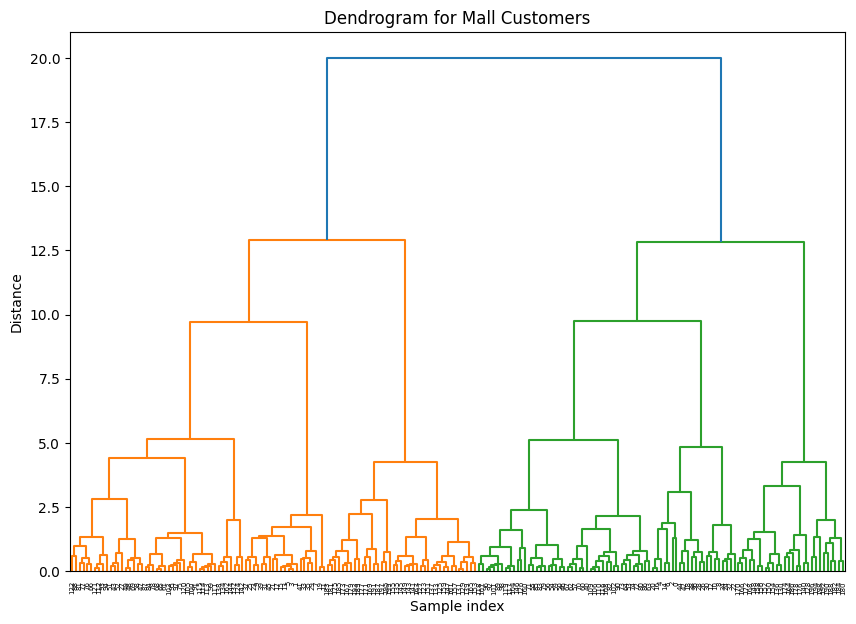

In [38]:
linked = linkage(agdata_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Mall Customers')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [41]:
n_clusters = 4  
cluster = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels = cluster.fit_predict(agdata_scaled)

# Add cluster labels to the original data
agglom_df['Cluster'] = labels

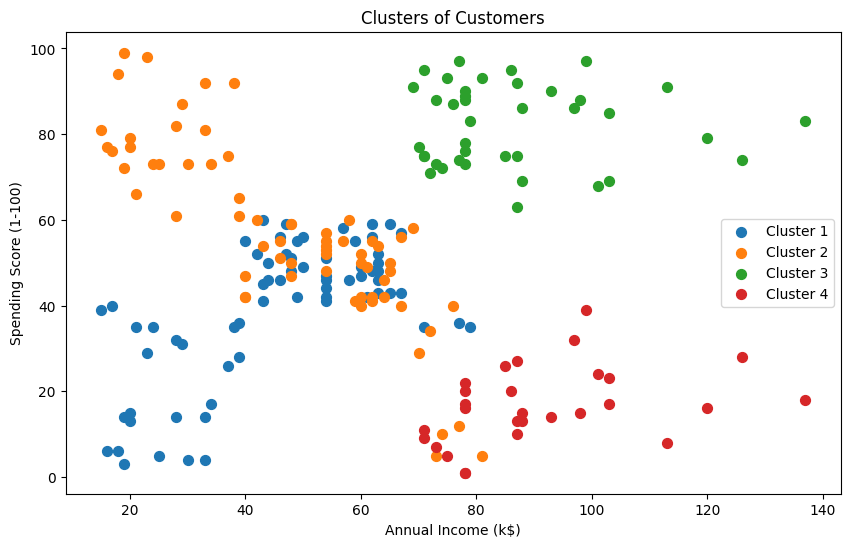

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(agglom_df['Annual Income (k$)'][agglom_df['Cluster'] == 0], agglom_df['Spending Score (1-100)'][agglom_df['Cluster'] == 0], s=50, label='Cluster 1')
plt.scatter(agglom_df['Annual Income (k$)'][agglom_df['Cluster'] == 1], agglom_df['Spending Score (1-100)'][agglom_df['Cluster'] == 1], s=50, label='Cluster 2')
plt.scatter(agglom_df['Annual Income (k$)'][agglom_df['Cluster'] == 2], agglom_df['Spending Score (1-100)'][agglom_df['Cluster'] == 2], s=50, label='Cluster 3')
plt.scatter(agglom_df['Annual Income (k$)'][agglom_df['Cluster'] == 3], agglom_df['Spending Score (1-100)'][agglom_df['Cluster'] == 3], s=50, label='Cluster 4')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [47]:

print(agglom_df['Cluster'].value_counts())


Cluster
0    67
1    66
2    39
3    28
Name: count, dtype: int64


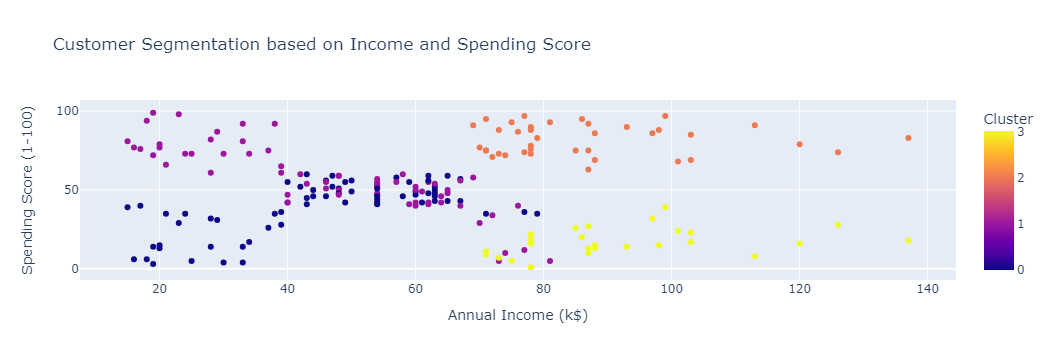

In [45]:
import plotly.express as px

# Using the same DataFrame `df` from above
fig = px.scatter(agglom_df, x='Annual Income (k$)', y='Spending Score (1-100)', color='Cluster', title='Customer Segmentation based on Income and Spending Score')
fig.show()

### The model results are quite similar, yet subtle differences exist, particularly near the graph's center. Some points clustered together by K-means are separated in the agglomerative clustering results. In the K-means example, cluster 3 dominates the center, becoming the largest cluster. Agglomerative clustering, on the other hand, distributes the center points more evenly. This indicates that the two methods interpret the similarity of certain points differently.

## The inclusion of the agglomerative clustering method reinforces some of the insights I made using K-means in earlier, with some subtle differences.   
## (Using the K-means cluster cluster labels) 
## - Cluster 3 represents customers (Low to Moderate Annual Income) that tend to spend a low to moderate amount of money when shopping.
## - Cluster 1 shows customer (Moderate to High annual income) that tend to spend a high amount of money when shopping. 
## - Cluster 0 represents customers (Moderate to High income) that tend to spend a Low amount of money when shopping. 
## - Cluster 2 represents customer (Low monthly income) that tend to spend  High amount of money when shopping.
## 3    95
## 1    39
## 0    38
## 2    28


## (Agglomerative Clustering) 
## 0    67
## 1    66
## 2    39
## 3    28

## Cluster 0 has the most (Low to Moderate income that spend a low to moderate amount )
## Followed by Cluster 1 ( Low to Moderate income that spend a mostly moderate to high amount) 
## Cluster 2 (Moderate to High Income, High Spending)
## Cluster 3 (Moderate to High Income, Low Spending) 

## Through visualizations, you can see that the most visitors of the mall are those with a moderate to low income. Through the two models we see that the largest clusters also exists at these sections and show the most similarities. Some information that might be useful to a business would be that most customers are low to moderate income and that most spend a moderate amount. They could then cater the products in the mall towards these customers in order to sell products they are most likely to be interested in. 

## Business Applications of Customer Clustering

## As previously mentioned, customer segmentation derived from clustering can have significant implications for businesses. Here's a breakdown of the potential benefits and drawbacks:

## Benefits:

## Targeted Marketing: By understanding customer clusters with definitions like "high income, high spender" or "low income, high spender," businesses can tailor their marketing strategies to specific segments. This allows them to target customers with more relevant products and promotions, potentially increasing sales.
## Improved Customer Experience: Insights from clustering can help businesses understand why certain customer segments spend a particular way. This knowledge can be used to develop targeted product offerings that better meet customer needs, ultimately enhancing the customer experience.
## Drawbacks:

## Over-segmentation: Customer segmentation based solely on income or spending habits might be overly simplistic and fail to capture the full picture of customer behavior. This could lead to offering products that customers don't truly need.
## Privacy Concerns: While customer segmentation offers valuable insights, businesses must be mindful of data privacy regulations and customer expectations.

## References

### https://stackoverflow.com/questions/67254161/documentation-or-code-sample-for-agglomerative-clustering
### https://stackoverflow.com/questions/71929796/plotting-a-dendrogram

Code: 